In [33]:
%reset -f
import sys
sys.path.append('/home/psimmerl/mds_analysis')

import pathlib

import math
import numpy as np
import numba as nb
from math import ceil, floor

from src.histo_utilities import std_color_list as SCL
# from src.helper_functions import alert, Table, weight_calc

from src import CMS_lumi, tdrstyle
root_style = tdrstyle.setTDRStyle()

import ROOT as rt
from ROOT import RDataFrame
from ROOT import TCanvas, TLatex, TLegend, TLine, TBox
from ROOT import TH1D, TH2D, TGraph, TGraphErrors, TGraphAsymmErrors


# **************************** #
LOCAL_DIR = '/home/psimmerl/mds_analysis'
OUT_DIR = f'{LOCAL_DIR}/reports/weekly/2024-04-15'

# **** #
MET_CATEGORY = ('lt200', 'low', 'high')[1]
TAG_CATEGORY = ('csccsc', 'cscdt')[1]
CUTSET = ('l1', 'scs', 'ropt', 'lopt')[3]
OOT = False#True

SIZE_VAR = TAG_CATEGORY[3:]

pathlib.Path(OUT_DIR).mkdir(parents=True, exist_ok=True)

# rt.gErrorIgnoreLevel = 1001  # rt.kInfo + 1
# rt.gROOT.SetBatch(True)
PI = rt.TMath.Pi()

# rt.EnableImplicitMT(4)
# print('Enabled ROOT\'s implicit multithreading (sometimes causes a crash)')

gc = []

# **************** #
print(f'{OOT=}')
print(f'{CUTSET=}')
print(f'{TAG_CATEGORY=}')
print(f'{MET_CATEGORY=}')
print('')

print(f'{OUT_DIR=}')
print('')



OOT=False
CUTSET='lopt'
TAG_CATEGORY='cscdt'
MET_CATEGORY='low'

OUT_DIR='/home/psimmerl/mds_analysis/reports/weekly/2024-04-15'



/home/psimmerl/mds_analysis/rand_scores_cscdt_roptDNN_low.pkl (n iterations = 201)

        'MIN_CSC_TIME' : -5.00,
        'MAX_CSC_TIME' : 12.50,
        'MAX_CSC_TSPREAD' : 20.00,
        'MAX_RPC_BX' : 0.00,
        'MIN_RPC_HITS' : 1.00,
        'MAX_CSC_JET' : 107.00,
        'MAX_DT_JET' : 10.00,
        'MAX_CSC_MUON' : 187.00,
        'MAX_DT_MUON' : 192.00,
        'MAX_ME1' : 0.00,
        'MAX_MB1' : 10.00,
        'HALO_CUTOFF' : 0.04,
        'MIN_DPHI' : 0.40,
        'MIN_DETA' : 0.00,
        'MAX_DETA' : 4.00,
        'MIN_CSC_DNN' : 0.34,
        'MIN_DT_DNN' : 0.28,
        'MIN_DT_SIZE' : 50.00,

Final Scores: S = 1364.6, B =    36, S/sqrt[B] =  62.9
    Approximate Limit (95% CL) = 3.18e-02

Best Scores : S = 1364.6, B =    36, S/sqrt[B] =  62.9
    Approximate Limit (95% CL) = 3.18e-02


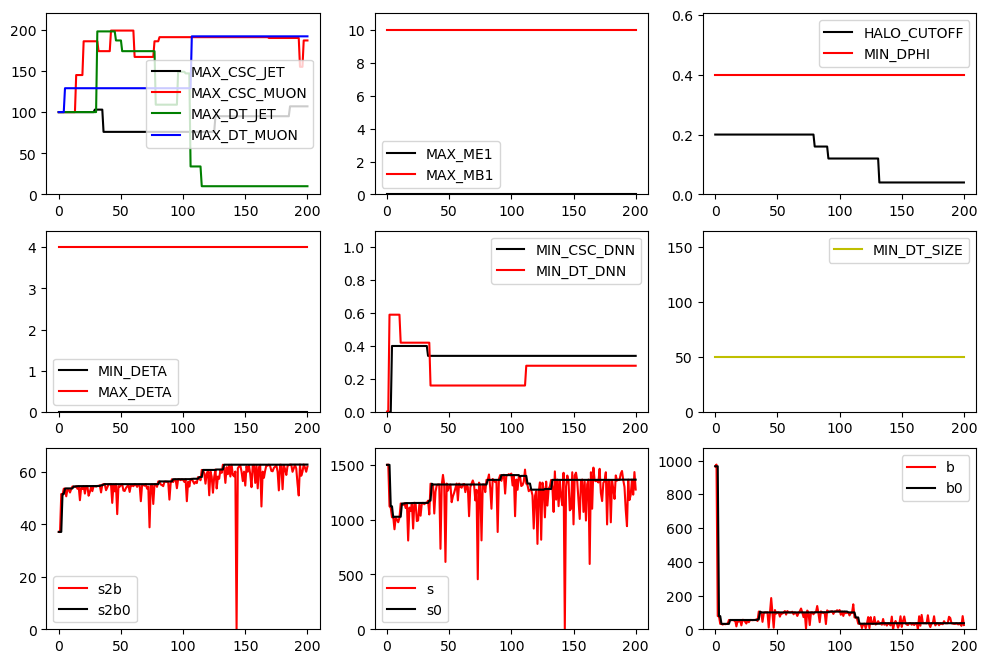

In [102]:
import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt

# ******************************** #

# # OOT, No DNN
# fn_opt_history = f'{LOCAL_DIR}/loo_scores_cscdtOOT_lopt_lt200.pkl'
# fn_opt_history = f'{LOCAL_DIR}/loo_scores_cscdtOOT_lopt_low.pkl'
# fn_opt_history = f'{LOCAL_DIR}/loo_scores_cscdtOOT_lopt_high.pkl'

# # IT, No DNN
# fn_opt_history = f'{LOCAL_DIR}/loo_scores_cscdt_lopt_lt200.pkl'
# fn_opt_history = f'{LOCAL_DIR}/loo_scores_cscdt_lopt_low.pkl'
# fn_opt_history = f'{LOCAL_DIR}/loo_scores_cscdt_lopt_high.pkl'

# # OOT, With DNN
# fn_opt_history = f'{LOCAL_DIR}/loo_scores_cscdtOOT_loptDNN_lt200.pkl'
# fn_opt_history = f'{LOCAL_DIR}/loo_scores_cscdtOOT_loptDNN_low.pkl'
# fn_opt_history = f'{LOCAL_DIR}/loo_scores_cscdtOOT_loptDNN_high.pkl'

# # IT, With DNN
# fn_opt_history = f'{LOCAL_DIR}/loo_scores_cscdt_loptDNN_lt200.pkl'
# fn_opt_history = f'{LOCAL_DIR}/loo_scores_cscdt_loptDNN_low.pkl'
# fn_opt_history = f'{LOCAL_DIR}/loo_scores_cscdt_loptDNN_high.pkl'


fn_opt_history = f'{LOCAL_DIR}/rand_scores_cscdt_roptDNN_low.pkl'


# **** #
with open(fn_opt_history, 'rb') as f:
    loo = pickle.load(f)

print(f'{fn_opt_history} (n iterations = {len(loo)})')
print('')

# **** #
cut_names = list(loo[-1][-1].keys())
cuts = np.array([[l[-1][k] for k in cut_names] for l in loo])

s2b = np.array([l[2] for l in loo])
s = np.array([l[3] for l in loo])
b = np.array([l[4] for l in loo])

s2b0 = np.array([l[6] for l in loo])
s0 = np.array([l[7] for l in loo])
b0 = np.array([l[8] for l in loo])


# **** #
f, grid = plt.subplots(3,3,figsize=(12,8))

t = np.arange(len(cuts))

grid[0,0].plot(t, cuts[:,5], 'k', label=cut_names[5])
grid[0,0].plot(t, cuts[:,7], 'r', label=cut_names[7])
grid[0,0].plot(t, cuts[:,6], 'g', label=cut_names[6])
grid[0,0].plot(t, cuts[:,8], 'b', label=cut_names[8])
grid[0,0].legend()
grid[0,0].set_ylim(0, 200*1.1)

grid[0,1].plot(t, cuts[:,9], 'k', label=cut_names[9])
grid[0,1].plot(t, cuts[:,10], 'r', label=cut_names[10])
grid[0,1].legend()
grid[0,1].set_ylim(0,10*1.1)

grid[0,2].plot(t, cuts[:,11], 'k', label=cut_names[11])
grid[0,2].plot(t, cuts[:,12], 'r', label=cut_names[12])
grid[0,2].legend()
grid[0,2].set_ylim(0, 0.55*1.1)

grid[1,0].plot(t, cuts[:,13], 'k', label=cut_names[13])
grid[1,0].plot(t, cuts[:,14], 'r', label=cut_names[14])
grid[1,0].legend()
grid[1,0].set_ylim(0, 4*1.1)

grid[1,1].plot(t, cuts[:,15], 'k', label=cut_names[15])
grid[1,1].plot(t, cuts[:,16], 'r', label=cut_names[16])
grid[1,1].legend()
grid[1,1].set_ylim(0, 1*1.1)

grid[1,2].plot(t, cuts[:,17], 'y', label=cut_names[17])
grid[1,2].legend()
grid[1,2].set_ylim(0, 150*1.1)

grid[2,0].plot(t, s2b, 'r', label='s2b')
grid[2,0].plot(t, s2b0, 'k', label='s2b0')
grid[2,0].legend()
grid[2,0].set_ylim(0, max(s2b0.max(), s2b.max())*1.1)

grid[2,1].plot(t, s, 'r', label='s')
grid[2,1].plot(t, s0, 'k', label='s0')
grid[2,1].legend()
grid[2,1].set_ylim(0, max(s0.max(), s.max())*1.1)

grid[2,2].plot(t, b, 'r', label='b')
grid[2,2].plot(t, b0, 'k', label='b0')
grid[2,2].legend()
grid[2,2].set_ylim(0, max(b0.max(), b.max())*1.1)

# **** #
adj = max([len(k) for k in cut_names])
icol = 0
for ik, (k, v) in enumerate(loo[-1][-1].items()):
    icol+=1
    # print(f'{k:>{adj}} = {v:6.2f}',end=' | ' if icol%5 and ik+1!=len(loo[-1][-1]) else '\n')
    print(f'        \'{k}\' : {v:.2f},')

print('')

print(f'Final Scores: S = {s0[-1]:6.1f}, B = {b0[-1]:5.0f}, S/sqrt[B] = {s2b0[-1]:5.1f}')
print(f'    Approximate Limit (95% CL) = {2/s2b0[-1]:.2e}')
print('')

idx = np.argmax(s2b0 * (b0>3))
print(f'Best Scores : S = {s0[idx]:6.1f}, B = {b0[idx]:5.0f}, S/sqrt[B] = {s2b0[idx]:5.1f}')
print(f'    Approximate Limit (95% CL) = {2/s2b0[idx]:.2e}')


In [72]:
idx = np.argmax(s2b * (s>1000) * (b>9))
best = loo[idx]

print(f'{best[0]} = {best[1]:.2f}')

print(f'Best Scores : S = {s[idx]:6.1f}, B = {b[idx]:5.0f}, S/sqrt[B] = {s2b[idx]:5.1f}')
print(f'    Approximate Limit (95% CL) = {2/s2b[idx]:.2e}')
print('')

for ik, (k, v) in enumerate(best[-1].items()):
    print(f'        \'{k}\' : {v:.2f},')

DT DNN = 0.28
Best Scores : S = 1068.0, B =    21, S/sqrt[B] = 233.1
    Approximate Limit (95% CL) = 8.58e-03

        'MIN_CSC_TIME' : -5.00,
        'MAX_CSC_TIME' : 12.50,
        'MAX_CSC_TSPREAD' : 20.00,
        'MAX_RPC_BX' : 0.00,
        'MIN_RPC_HITS' : 1.00,
        'MAX_CSC_JET' : 160.00,
        'MAX_DT_JET' : 14.00,
        'MAX_CSC_MUON' : 189.00,
        'MAX_DT_MUON' : 195.00,
        'MAX_ME1' : 0.00,
        'MAX_MB1' : 0.00,
        'HALO_CUTOFF' : 0.00,
        'MIN_DPHI' : 0.40,
        'MIN_DETA' : 0.00,
        'MAX_DETA' : 4.00,
        'MIN_CSC_DNN' : 0.51,
        'MIN_DT_DNN' : 0.84,
        'MIN_DT_SIZE' : 50.00,


/tmp/ipykernel_5412/673702712.py:2: RuntimeWarning: invalid value encountered in divide
  s2b2 = s/((s+b)**0.5)


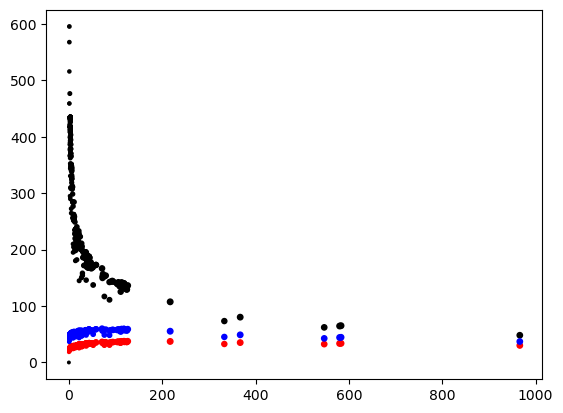

In [89]:
# f = 2*((s+b)**0.5-(b)**0.5)
# s2b2 = s/((s+b)**0.5)
# # plt.plot(t,f/s2b)

# # plt.plot(t,s/(b**0.5)s2b, 'k')
# # plt.plot(t,s2b2, 'r')
# # plt.plot(t,f, 'b')

# plt.scatter(b,s2b,s/100,'k')
# plt.scatter(b,s2b2,s/100, 'r')
# plt.scatter(b,f,s/100, 'b')

In [129]:
limit_r2 = 2.16e-03
lumi_adj = 1#23/50#23/137


limit = 1.25e-02
s, b = 320.2, 1

# # s2b12 in closure test
# limit = 0.0036639723472 * 2.6022
# s, b = 1229.9,6

# # s2b12 in closure test, adj for run2 BR
# limit = 0.0036639723472 * 2.6022
# s, b = 1229.9,6

# # s2b in closure test
# limit = 0.0036639723472 * 1.2845
# s, b = 1229.9*limit_r2,6

limit = 0.00355079945617 * 1.3827
s , b = 1010, 1.2

s2b1 = s/(b**0.5)
s2b2 = s/((s+b)**0.5)
s2b12 = 2*((s+b)**0.5 - (b**0.5))


print(f'limit :        {limit:>4.2e} ({limit/limit_r2 * lumi_adj:.2f})')
print(f's2b1  : {s2b1:>5.1f}, {1/s2b1:>4.2e}, {(1/s2b1)/limit:.2f}, {(1/s2b1-limit)/limit:.3f}')
print(f's2b2  : {s2b2:>5.1f}, {1/s2b2:>4.2e}, {(1/s2b2)/limit:.2f}, {(1/s2b2-limit)/limit:.3f}')
print(f's2b12 : {s2b12:>5.2f}, {1/s2b12:>4.2e}, {(1/s2b12)/limit:.2f}, {(1/s2b12-limit)/limit:.3f}')


limit :        4.91e-03 (2.27)
s2b1  : 922.0, 1.08e-03, 0.22, -0.779
s2b2  :  31.8, 3.15e-02, 6.41, 5.413
s2b12 : 61.41, 1.63e-02, 3.32, 2.317


In [ ]:
# 269 | X |           MB1 =   0.00 ( 10.00) | 2.13 (1.28),  906 (1104),    24 (   45)

2.31 = ( (S*limit_r2 + 0)**0.5 - ( b )**0.5)